In [1]:
import csv
import string
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
train = pd.read_excel("train_nor_811.xlsx")
valid = pd.read_excel("valid_nor_811.xlsx")
test = pd.read_excel("test_nor_811.xlsx")

train

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,Emotion,Sentence
0,188,Other,cho mình xin bài nhạc tên là gì với ạ
1,166,Disgust,cho đáng đời con quỷ . về nhà lôi con nhà mày ...
2,1345,Disgust,lo học đi . yêu đương lol gì hay lại thích học...
3,316,Enjoyment,uớc gì sau này về già vẫn có thể như cụ này :))
4,1225,Enjoyment,mỗi lần có video của con là cứ coi đi coi lại ...
...,...,...,...
5543,1332,Disgust,đường của nhà cụ hay sao mà cụ cấm người ta đỗ...
5544,825,Other,nhìn mặt héo queo luôn
5545,165,Other,tao đi xe máy mỗi lần muốn để xe đi đâu là phi...
5546,363,Enjoyment,thích thân hình boss rồi nhan 😌


In [2]:
from nltk.tokenize import word_tokenize
from collections import Counter
arr=[]
words=[]
for i in train["Sentence"]:
    a = i.split()
    for j in a:
        words.append(j)
words = Counter(words)
words = words.most_common()

In [3]:
train.drop(['Unnamed: 0'], axis=1, inplace=True)
valid.drop(['Unnamed: 0'], axis=1, inplace=True)
test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
replacers = {'k' :'không',
             'v' :'vậy',
             't' :'tao',
             'm' : 'mày'
    }
def replace_text(text):
    text = text.str.lower().str.split()
    return text.apply(lambda x: ' '.join([replacers.get(ele, ele) for ele in x]))

In [5]:
f = open("vietnamese-stopwords1.txt", "r", encoding = "UTF-8")
fn = f.read()
stopword = fn.split()

def process_text(text):
    text = text.str.replace(r'[^\w\n\s]+', '')
    text = text.str.lower().str.split()
    return text.apply(lambda x: ' '.join([item for item in x if item not in stopword ]))
stopword

['\ufefflà',
 'có',
 'mà',
 'này',
 'nó',
 'thì',
 'người',
 'con',
 'rồi',
 'cái',
 'cho',
 'cũng',
 'gì',
 'như',
 'làm',
 'lại',
 'quá',
 'thế',
 'mình',
 'ra',
 'còn',
 'của',
 'nào',
 'thấy',
 'em',
 'thôi',
 'anh',
 'vậy',
 'sao',
 'và',
 'để',
 'đó',
 'luôn',
 'biết',
 'cả',
 'nói',
 'với',
 'giờ',
 'ai',
 'chỉ',
 'nữa',
 'đến',
 'một',
 'ở',
 'nhiều',
 'vì',
 'đây',
 'trong',
 'chứ',
 '2',
 '1',
 'khác',
 'à',
 'từ',
 'dume',
 '3',
 'ý',
 'nay',
 'tới',
 'mỗi',
 'sau',
 'sang',
 'rủa',
 'rộng',
 'rớ',
 'rớt',
 'rờ',
 'rỡi',
 'rợn',
 'rụg',
 'rụi',
 'rụng',
 'rụnng',
 'rủ',
 'rứa',
 'rủi',
 'san',
 'rỗng',
 'rừng',
 'rửa',
 'rựa',
 'rực',
 'sa',
 'sad',
 'sag',
 'sai',
 'said',
 'sale',
 'rộ',
 '01',
 'sanh',
 'rẻ',
 'rải',
 'rảnh',
 'rất',
 'rầm',
 'rần',
 'rầu',
 'rẩy',
 'rập',
 'rật',
 'rắm',
 'rắn',
 'rằng',
 'rặt',
 'rẽ',
 'rổ',
 'rết',
 'rể',
 'rỉ',
 'ứng',
 'ipx',
 'internet',
 'inter',
 'input',
 'inh',
 'incon',
 'incheon',
 'in',
 'immm',
 'im',
 'iemm',
 'idol',
 'idi

In [6]:
train['Sentence'] = process_text(train['Sentence'])
train['length'] = train['Sentence'].apply(len)
train.head()

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Emotion,Sentence,length
0,Other,xin bài nhạc tên là ạ,21
1,Disgust,đáng đời về nhà lôi nhà mày đánh,32
2,Disgust,lo đi yêu đương lol hay thích sinh,34
3,Enjoyment,uớc về già vẫn thể cụ,21
4,Enjoyment,lần video là cứ coi đi coi hoài cưng,36


In [7]:
test['Sentence'] = process_text(test['Sentence'])
test['length'] = test['Sentence'].apply(len)
test.head()

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Emotion,Sentence,length
0,Sadness,ta bạn bè nhìn vui,18
1,Surprise,nghỉ viêc mói đúng goi là luật,30
2,Disgust,kinh,4
3,Fear,nhà không xa lắm nhưng chưa bao đi sợ bị đè bẹp,47
4,Anger,bố không thích nộp đấy mày thích kiến không,43


In [8]:
valid['Sentence'] = process_text(valid['Sentence'])
valid['length'] = valid['Sentence'].apply(len)
valid.head()

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Emotion,Sentence,length
0,Other,tính tao tao chẳng chuyện thể tao phát điên,43
1,Enjoyment,là lào cai tự hào quê,21
2,Sadness,bị chối,7
3,Enjoyment,tam đảo trời đẹp các mem,24
4,Other,đọc bình luận thằng không thiếu chữ,35


In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

count = train['Emotion'].value_counts()
count

Enjoyment    1558
Disgust      1071
Other        1021
Sadness       947
Anger         391
Fear          318
Surprise      242
Name: Emotion, dtype: int64

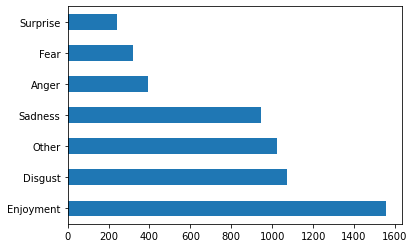

In [10]:
count.plot(kind="barh", fontsize=10)

In [11]:
train = train.replace({'Emotion': {'Disgust': 0, 'Enjoyment': 1, 'Anger': 2, 'Surprise': 3, 'Sadness': 4 , 'Fear': 5, 'Other': 6}})
test = test.replace({'Emotion': {'Disgust': 0, 'Enjoyment': 1, 'Anger': 2, 'Surprise': 3, 'Sadness': 4 , 'Fear': 5, 'Other': 6}})
valid = valid.replace({'Emotion': {'Disgust': 0, 'Enjoyment': 1, 'Anger': 2, 'Surprise': 3, 'Sadness': 4 , 'Fear': 5, 'Other': 6}})
train.head()

,Emotion,Sentence,length
0,6,xin bài nhạc tên là ạ,21
1,0,đáng đời về nhà lôi nhà mày đánh,32
2,0,lo đi yêu đương lol hay thích sinh,34
3,1,uớc về già vẫn thể cụ,21
4,1,lần video là cứ coi đi coi hoài cưng,36


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
Xtrain_tfid = vectorizer.fit_transform(train['Sentence'])
first_vectorizer = Xtrain_tfid[0]
df = pd.DataFrame(first_vectorizer.T.todense(), index=vectorizer.get_feature_names(), columns = ['tfidf'])
df_tfidf = df.sort_values(by=["tfidf"],ascending=False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_tfidf)
    
Xtest = vectorizer.transform(test['Sentence'])
Xvalid = vectorizer.transform(valid['Sentence'])

                            tfidf
nhạc                     0.523434
tên                      0.520118
xin                      0.460623
bài                      0.437644
là                       0.227573
súng                     0.000000
súc                      0.000000
sáng                     0.000000
sánh                     0.000000
sáp                      0.000000
sát                      0.000000
sáu                      0.000000
sân                      0.000000
sâu                      0.000000
săn                      0.000000
sét                      0.000000
sì                       0.000000
síu                      0.000000
sòng                     0.000000
sóc                      0.000000
sái                      0.000000
sóng                     0.000000
sút                      0.000000
sót                      0.000000
súp                      0.000000
sông                     0.000000
sùm                      0.000000
súa                      0.000000
sán           

In [13]:
X_train = Xtrain_tfid
y_train = train['Emotion']
X_test = Xtest
y_test = test['Emotion']
X_valid = Xvalid
y_valid = valid['Emotion']

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1, random_state=1, solver='liblinear', penalty = 'l1')
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print('Accuracy score = ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.58      0.54       132
           1       0.53      0.70      0.60       193
           2       0.29      0.17      0.22        40
           3       0.50      0.08      0.14        37
           4       0.59      0.51      0.55       116
           5       0.82      0.61      0.70        46
           6       0.41      0.40      0.41       129

    accuracy                           0.52       693
   macro avg       0.52      0.44      0.45       693
weighted avg       0.52      0.52      0.51       693

Accuracy score =  0.5194805194805194


In [16]:
# Support Vector Machine
from sklearn.svm import SVC
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

In [17]:
print(classification_report(y_valid,y_pred))
print('Accuracy score = ',accuracy_score(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54       135
           1       0.57      0.78      0.66       214
           2       0.67      0.24      0.36        49
           3       0.33      0.03      0.06        30
           4       0.55      0.48      0.51        86
           5       0.74      0.45      0.56        31
           6       0.47      0.40      0.43       141

    accuracy                           0.54       686
   macro avg       0.55      0.43      0.45       686
weighted avg       0.54      0.54      0.52       686

Accuracy score =  0.5408163265306123


In [18]:
# KNearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)

In [19]:
print(classification_report(y_valid,y_pred))
print('Accuracy score = ',accuracy_score(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51       135
           1       0.48      0.82      0.60       214
           2       0.62      0.10      0.18        49
           3       0.00      0.00      0.00        30
           4       0.40      0.41      0.40        86
           5       0.78      0.45      0.57        31
           6       0.41      0.18      0.25       141

    accuracy                           0.48       686
   macro avg       0.46      0.36      0.36       686
weighted avg       0.46      0.48      0.43       686

Accuracy score =  0.4752186588921283


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 1)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_valid)

In [21]:
print(classification_report(y_valid,y_pred))
print('Accuracy score = ',accuracy_score(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.49      0.49       135
           1       0.59      0.70      0.64       214
           2       0.56      0.20      0.30        49
           3       0.18      0.17      0.17        30
           4       0.48      0.52      0.50        86
           5       0.64      0.45      0.53        31
           6       0.43      0.40      0.41       141

    accuracy                           0.50       686
   macro avg       0.48      0.42      0.43       686
weighted avg       0.50      0.50      0.49       686

Accuracy score =  0.5043731778425656


In [22]:
# SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=2)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_valid)

In [23]:
print(classification_report(y_valid,y_pred))
print('Accuracy score = ',accuracy_score(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51       135
           1       0.60      0.71      0.65       214
           2       0.47      0.33      0.39        49
           3       0.20      0.03      0.06        30
           4       0.43      0.53      0.47        86
           5       0.60      0.48      0.54        31
           6       0.41      0.38      0.39       141

    accuracy                           0.51       686
   macro avg       0.46      0.42      0.43       686
weighted avg       0.50      0.51      0.50       686

Accuracy score =  0.5116618075801749


In [24]:
# Grid Search on Logistic Regression 
from sklearn.model_selection import GridSearchCV , cross_val_score
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1','l2']}
grid_search_log = GridSearchCV(estimator=lr,param_grid=lr_params,scoring='accuracy',cv=10,n_jobs=-1)
grid_search_log = grid_search_log.fit(X_train,y_train)
y_pred_log = grid_search_log.predict(X_valid)

In [25]:
print(classification_report(y_valid,y_pred_log))
print('Accuracy score = ',accuracy_score(y_valid, y_pred_log))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56       135
           1       0.71      0.60      0.65       214
           2       0.32      0.43      0.37        49
           3       0.29      0.50      0.37        30
           4       0.44      0.57      0.50        86
           5       0.50      0.55      0.52        31
           6       0.47      0.39      0.43       141

    accuracy                           0.52       686
   macro avg       0.47      0.51      0.49       686
weighted avg       0.55      0.52      0.53       686

Accuracy score =  0.5247813411078717


In [32]:
# Grid Search on SGD Classifier
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 10.0, 100, 500], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=10,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(X_train,y_train)
y_pred_sgd = grid_search_sgd.predict(X_valid)

In [33]:
print(classification_report(y_valid,y_pred_sgd))
print('Accuracy score = ',accuracy_score(y_valid, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51       135
           1       0.60      0.71      0.65       214
           2       0.47      0.33      0.39        49
           3       0.20      0.03      0.06        30
           4       0.43      0.53      0.47        86
           5       0.60      0.48      0.54        31
           6       0.41      0.38      0.39       141

    accuracy                           0.51       686
   macro avg       0.46      0.42      0.43       686
weighted avg       0.50      0.51      0.50       686

Accuracy score =  0.5116618075801749
